In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

# Implement Logistic Regression

This will be helpful to further familiarize yourself with Numpy and how Logistic Regression actually works.
If you face any problems, feel free to contact us in Slack

### Load the breast cancer dataset (from sklearn)

In [2]:
# Code here
from sklearn.datasets import load_breast_cancer
datas = load_breast_cancer()
df = pd.DataFrame(data = datas.data)

df.columns = datas.feature_names
df['target'] = datas.target

### Train test split

In [3]:
# Code here

from sklearn.model_selection import train_test_split
X = df.drop('target' , axis = 1)
y = df['target']
X_train , X_test , y_train ,  y_test = train_test_split(X , y , test_size = 0.3 )

### Apply feature scaling on the data

In [4]:
# Code here


""" Min-max Normalization using sklearn """

from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()


""" Standard Normalization  using sklearn""" 

# from sklearn.preprocessing import StandardScaler
# scalar = StandardScaler()


"""  datasets normalization while using sklearn""" 

X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)


In [5]:
sample, featue =  X_train.shape

### Define the Parameters (W or Θ) here
Create an appropriate shape numpy array for W

In [6]:
W = np.random.rand(featue)  # Weights
alpha = 0.03# Learning Rate
W.shape

(30,)

### Define sigmoid and its derivative
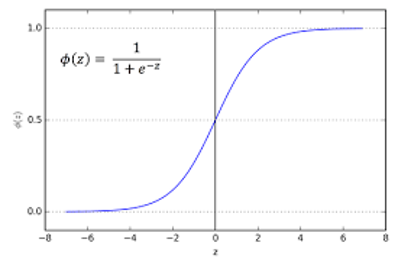

In [7]:
def sigmoid(X: np.array):
    # Apply sigmoid to X and return 
    z = 1/(1+np.exp(-X))
    return z

def sigmoid_(X: np.array):
    # return derivative of sigmoid
    z = sigmoid(X)
    dz = z*(1-z)
    return dz

### Prediction methods

In [8]:
def predict_prob(X, W):
    # Return the class probabilities here
    y  = X.dot(W)
    z = sigmoid(y)
    return z

### Define the Cross entropy loss function

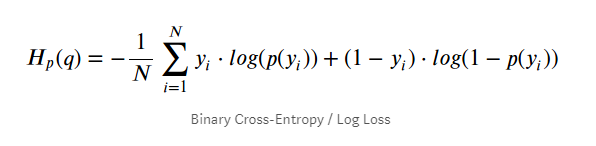

In [9]:
# Code here
def binary_cross_entropy(y, yhat):
    n  = y.shape[0]
    first_exp = np.sum(y.dot(np.log(yhat)))
    second_exp = np.sum((1-y).dot(np.log(1-yhat)))
    expression = -(first_exp + second_exp)/n
    return expression

In [10]:
yhat = predict_prob(X_train, W)
# yhat

In [11]:
loss = binary_cross_entropy(y_train, yhat)
print(loss)

2.0356063017354735


# Solve using Gradient Descent

### Calculate gradient
For practice, you can try to derive the gradient using pen and paper

In [12]:
def compute_gradient(X, y, yhat, W):
    dw = X.T.dot (np.subtract(yhat , y))/sample
    
    return dw


### Update Weights

In [13]:
# Code here
W = W - alpha*compute_gradient(X_train, y_train, yhat ,  W)

# W.shape
W

array([ 5.45264381e-01,  1.11578586e-01,  2.00754200e-01,  5.75434260e-01,
        9.94437924e-01,  4.92805954e-01,  6.26314404e-02,  8.27027028e-01,
        4.94697311e-01,  5.25382859e-01,  8.99209168e-01,  6.47412137e-01,
        4.00408417e-02,  4.73091514e-01,  2.93693359e-01,  8.65047957e-01,
        6.67761356e-01,  9.14722332e-01,  7.32901340e-01,  2.89070764e-01,
        5.41564268e-01,  1.35117619e-01,  8.50534159e-01,  7.31699081e-01,
        6.10990891e-01,  3.94052040e-01,  7.38993832e-01,  4.66232028e-01,
       -4.15999566e-04,  4.83413378e-01])

### Repeat for N- Iterations

In [14]:
N = 1000
losses = []
    
for i in range(N):
    # Predict
    yhat = predict_prob(X_train, W)
    
    
    # Calculate Loss
    loss = binary_cross_entropy(y_train, yhat)
    
    # Compute gradient dL/dW
    dW = compute_gradient(X_train, y_train, yhat, W)
    
    # Update the weights
    W = W - alpha*dW
    
    losses.append(loss)
    

In [15]:
losses

[2.020679604938758,
 2.0057917111896373,
 1.9909433867841257,
 1.9761354109600977,
 1.9613685759853465,
 1.9466436872382895,
 1.9319615632806195,
 1.91732303592155,
 1.9027289502728717,
 1.8881801647942953,
 1.8736775513284247,
 1.859221995124661,
 1.844814394851335,
 1.8304556625954314,
 1.8161467238490414,
 1.8018885174818535,
 1.7876819956988588,
 1.7735281239824294,
 1.7594278810180093,
 1.745382258602392,
 1.7313922615338915,
 1.7174589074833033,
 1.7035832268448619,
 1.6897662625661622,
 1.6760090699560939,
 1.6623127164698157,
 1.6486782814697492,
 1.6351068559615527,
 1.62159954230412,
 1.6081574538924857,
 1.5947817148126806,
 1.5814734594674391,
 1.5682338321717548,
 1.5550639867172695,
 1.5419650859044651,
 1.5289383010416606,
 1.5159848114098566,
 1.5031058036924827,
 1.4903024713691293,
 1.4775760140723935,
 1.4649276369070374,
 1.4523585497306726,
 1.4398699663952883,
 1.4274631039489758,
 1.4151391817973198,
 1.4028994208239725,
 1.3907450424700682,
 1.3786772677722154,


### Plot the loss curve

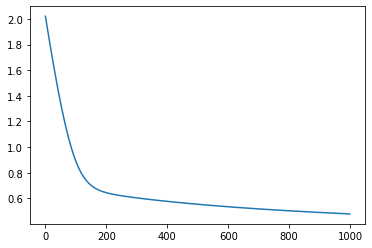

In [16]:
# Loss curve here

import matplotlib.pyplot as plt

plt.plot(losses)

### Calculate the classification report and the confusion matrix

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
# Scores here

y_pred = yhat.tolist()

train_y = y_train.tolist()

y_p = []
for y in y_pred:
    if(y > 0.5):
        data = 1
    else:
        data = 0
    y_p.append(data)
    
"""classification_report"""

print('Classification Report:')
print(classification_report(train_y, y_p ))


"""confusion_matrix"""

print('Confusion Matrix:')
print(confusion_matrix(train_y, y_p))


Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.87      0.80       151
           1       0.91      0.81      0.86       247

    accuracy                           0.84       398
   macro avg       0.83      0.84      0.83       398
weighted avg       0.85      0.84      0.84       398

Confusion Matrix:
[[132  19]
 [ 46 201]]


# BONUS: Create a LogisticRegression Class [OPTIONAL]
Create a Sklearn-like API

In [19]:
class LogisticRegression:
    # You can define additional functions as per your need
    def __init__(self, alpha=0.001, n_iter=100):
        self.W = None
        self.alpha = alpha
        self.n_iter = n_iter
        self.dW = None

    def fit(self, X, y):
        sample , feature = X.shape
        self.W = np.random.rand(feature)
        
        for i in range(0, self.n_iter):
                 
#             yhat = predict_prob(X, self.W)
            y  = X.dot(W)
            yhat = 1/(1+np.exp(-y))
   
            self.dW = compute_gradient(X, y, yhat, self.dW)            

            self.W = self.W - (self.alpha*self.dW)
    

    def predict(self, X):
        y  = X.dot(W)
        y_pred = 1/(1+np.exp(-y))

        pred = []
        for i in y_pred:
            if(i<0.5):
                data = 0
            else:
                data = 1
            pred.append(data)
            
        return np.array(pred)

In [20]:
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
loss = binary_cross_entropy(y_test, predictions)

loss

C:\Users\Dell\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
C:\Users\Dell\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


nan

### Compare metrics with Sklearn's implementation

In [21]:
from sklearn.linear_model import LogisticRegression as SKLogisticRegression

In [22]:
sklearn_model = SKLogisticRegression()
sklearn_model.fit(X_train, y_train)
sklearn_predictions = sklearn_model.predict(X_test)

In [23]:
### compare classification report and confusion matrix here

print('Ours Sklearn Classification Report:')
print(classification_report(y_test, predictions ))

print('Ours Sklearn Confusion Matrix:')
print(confusion_matrix(y_test, predictions))


print('Sklearn Classification Report:')
print(classification_report(y_test, sklearn_predictions ))

print('Sklearn Confusion Matrix:')
print(confusion_matrix(y_test, sklearn_predictions))

Ours Sklearn Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.84      0.79        61
           1       0.90      0.85      0.87       110

    accuracy                           0.84       171
   macro avg       0.83      0.84      0.83       171
weighted avg       0.85      0.84      0.84       171

Ours Sklearn Confusion Matrix:
[[51 10]
 [17 93]]
Sklearn Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.96        61
           1       0.96      0.99      0.98       110

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

Sklearn Confusion Matrix:
[[ 57   4]
 [  1 109]]
